# 제품 이상여부 판별 프로젝트


## 1. 데이터 불러오기


### 필수 라이브러리


In [2]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import (\n    accuracy_score,\n    classification_report,\n    confusion_matrix,\n    f1_score,\n    precision_score,\n    recall_score,\n)\nfrom sklearn.model_selection import train_test_split\nfrom tqdm import tqdm\n'

### 데이터 읽어오기


In [3]:
!ls

Untitled.ipynb
Untitled1.ipynb
pre.csv
team_eda.ipynb
team_pre_processing_0811.ipynb
train.csv
train_preprocessing.csv
train_shift_corrected.csv
train_shift_final.csv
vanila.ipynb


In [4]:
ROOT_DIR = "./"
RANDOM_STATE = 110

# Load data
df = pd.read_csv(os.path.join(ROOT_DIR, "pre.csv"))
df

,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,target
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,428.0,243.7,243.7,243.7,114.612,19.9,7.0,127,1,Normal
1,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,1324.2,243.5,243.5,243.5,114.612,19.8,10.0,73,1,Normal
2,Dam dispenser #1,AJX75334501,3M1XH425-1,240.0,2.5,-90,70,1030,-90,16,...,428.0,243.7,243.7,243.7,85.000,19.7,8.0,483,1,Normal
3,Dam dispenser #2,AJX75334501,4A1XB542-4,1000.0,12.5,90,70,280,90,16,...,1324.2,243.5,243.5,243.5,85.000,19.9,11.0,105,1,Normal
4,Dam dispenser #2,AJX75334501,4E1X9168-1,1000.0,12.5,90,85,280,90,16,...,1324.2,243.5,243.5,243.5,114.612,20.0,15.0,78,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam dispenser #1,AJX75334501,3H1XC952-1,240.0,2.5,-90,70,1030,-90,10,...,428.0,243.7,243.7,243.7,85.000,19.6,2.0,56,1,Normal
40502,Dam dispenser #1,AJX75334501,3H1X7981-1,240.0,2.5,-90,70,1030,-90,10,...,428.0,243.7,243.7,243.7,85.000,19.3,8.0,329,1,Normal
40503,Dam dispenser #1,AJX75334501,3J1XF434-2,240.0,2.5,-90,70,1030,-90,10,...,428.0,243.7,243.7,243.7,85.000,19.2,1.0,318,1,Normal
40504,Dam dispenser #2,AJX75334501,3I1XA258-1,1000.0,12.5,90,70,280,90,10,...,1324.2,243.5,243.5,243.5,85.000,20.1,13.0,117,1,Normal


In [5]:
for column in df.columns:
    print(column)

Equipment_Dam
Model.Suffix
Workorder
CURE END POSITION X Collect Result_Dam
CURE END POSITION Z Collect Result_Dam
CURE END POSITION Θ Collect Result_Dam
CURE SPEED Collect Result_Dam
CURE START POSITION X Collect Result_Dam
CURE START POSITION Θ Collect Result_Dam
DISCHARGED SPEED OF RESIN Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
Dispense Volume(Stage1) Collect Result_Dam
Dispense Volume(Stage2) Collect Result_Dam
Dispense Volume(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam
HEAD 

(array([ 2924.,  6925.,  5919.,  6008.,   592., 10598.,  2929.,   352.,
         1010.,  3249.]),
 array([708.5, 709.5, 710.5, 711.5, 712.5, 713.5, 714.5, 715.5, 716.5,
        717.5, 718.5]),
 <BarContainer object of 10 artists>)

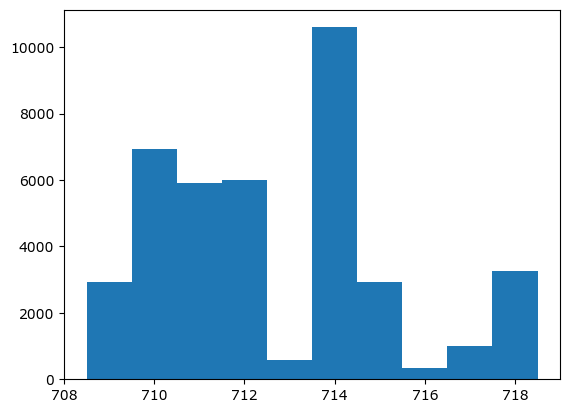

In [6]:
sumx=df["HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam"]+df["HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam"]
plt.hist(sumx)

(array([8.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0419e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 614.8 ,  689.56,  764.32,  839.08,  913.84,  988.6 , 1063.36,
        1138.12, 1212.88, 1287.64, 1362.4 ]),
 <BarContainer object of 10 artists>)

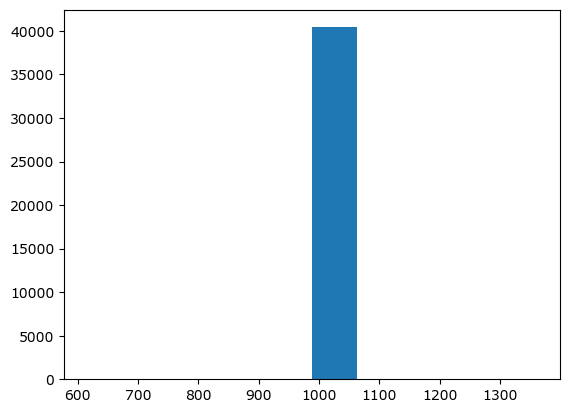

In [7]:
sumx=df["HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1"]+df["HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1"]
plt.hist(sumx)

In [8]:
# "PalletID"로 시작하는 열들을 필터링하고 "target" 열 추가
pallet = df.filter(like="PalletID").copy()

# 각 행의 값들이 모두 같은지 확인
pallet['same'] = pallet.eq(pallet.iloc[:, 0], axis=0).all(axis=1)

# 모든 열 값이 같지 않은 행들만 필터링
result = pallet[pallet["same"] == False]
result["target"]=df["target"]
# 결과 출력
len(result)

/private/var/mobile/Containers/Data/Application/74E5C9F0-0EEF-45A4-8B34-68229B480C79/tmp/ipykernel_3654/327157856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["target"]=df["target"]


83

In [9]:
check_df = df.filter(like='Equipment')

# 각 행에서 각 열의 마지막 숫자가 같은지 확인 (#1 or #2)
def last_digit_same(row):
    # 각 행의 마지막 숫자를 리스트로 추출
    last_digits = [int(str(val)[-1]) for val in row]
    # 모든 값이 동일한지 확인
    return all(x == last_digits[0] for x in last_digits)

# 각 equipment에 대해 동일한 Number인지 확인하는 새로운 열 추가
check_df['Same_Last_Digit'] = check_df.apply(last_digit_same, axis=1)
print(check_df['Same_Last_Digit'].value_counts())

# Same_Last_Digit 열에서 False행만 추출해 target을 살펴보면 Abnormal만 존재!
df.loc[check_df[check_df['Same_Last_Digit']==False].index]['target'].unique()

Same_Last_Digit
True     40472
False       34
Name: count, dtype: int64


/private/var/mobile/Containers/Data/Application/74E5C9F0-0EEF-45A4-8B34-68229B480C79/tmp/ipykernel_3654/640189092.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_df['Same_Last_Digit'] = check_df.apply(last_digit_same, axis=1)


array(['AbNormal'], dtype=object)

In [10]:
len(check_df[check_df['Same_Last_Digit']==False])

34

/private/var/mobile/Containers/Data/Application/74E5C9F0-0EEF-45A4-8B34-68229B480C79/tmp/ipykernel_3654/2034417529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dam["Model.Suffix"]=df["Model.Suffix"]


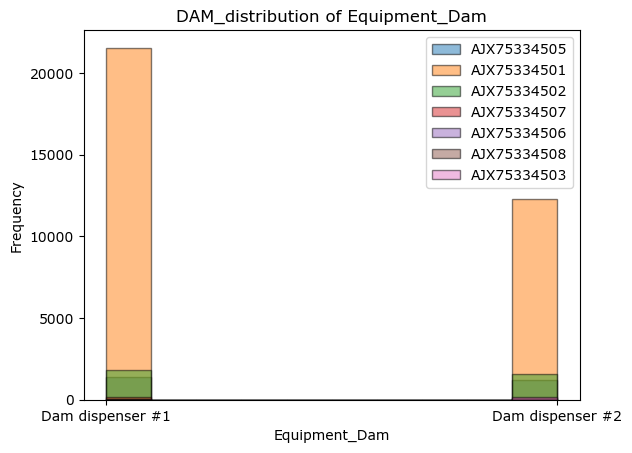

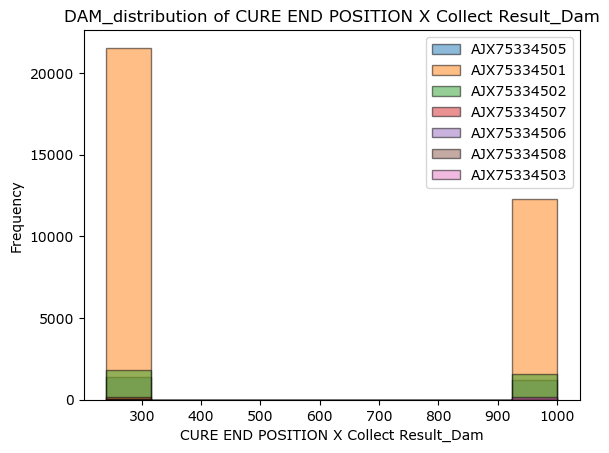

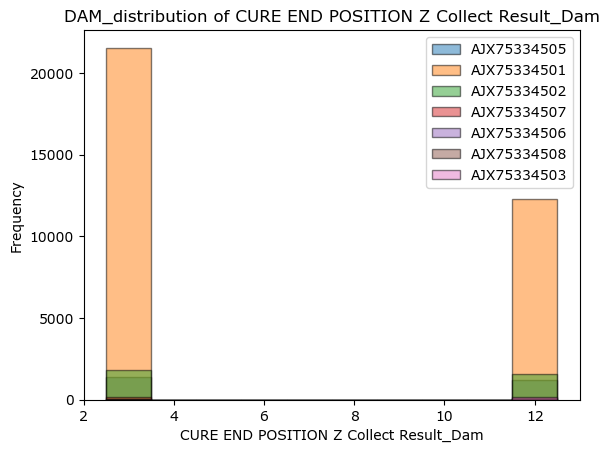

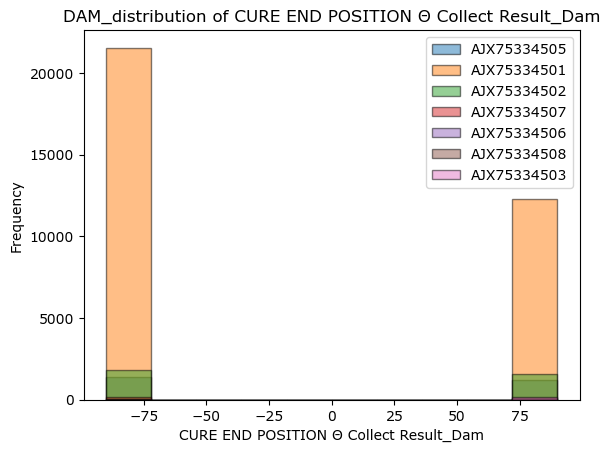

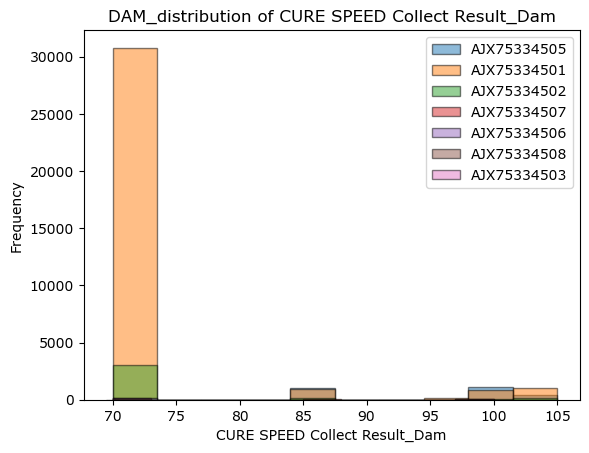

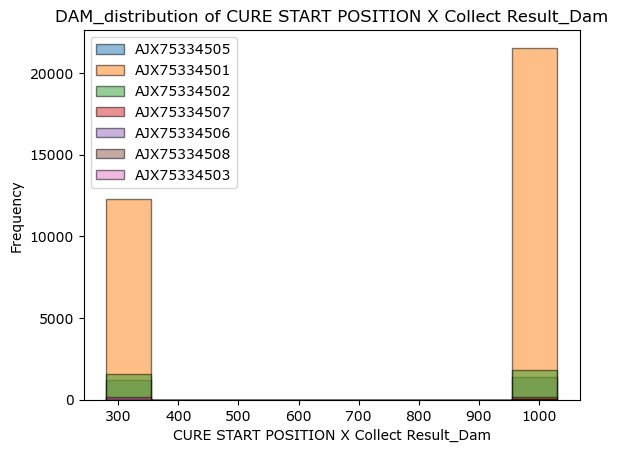

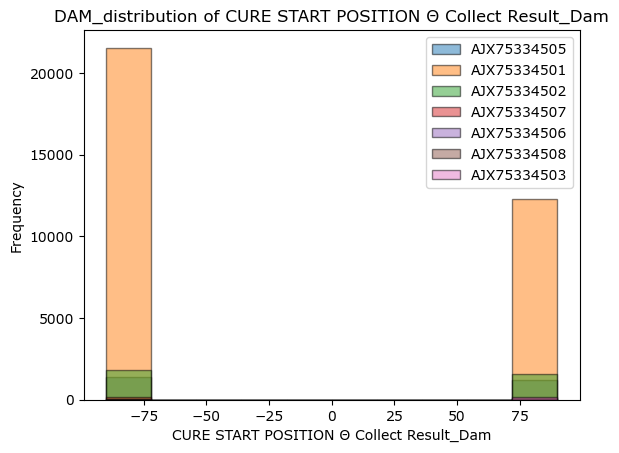

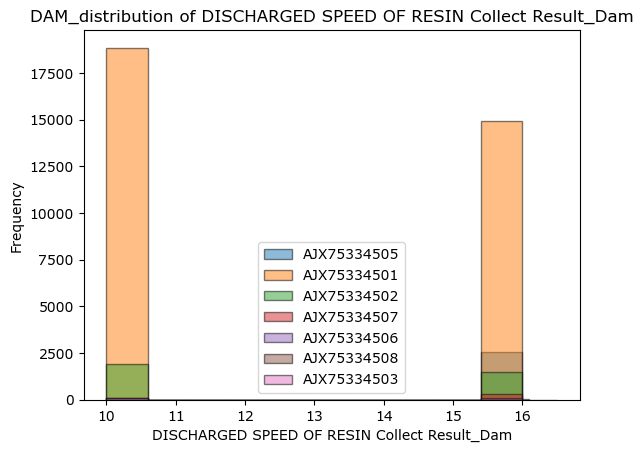

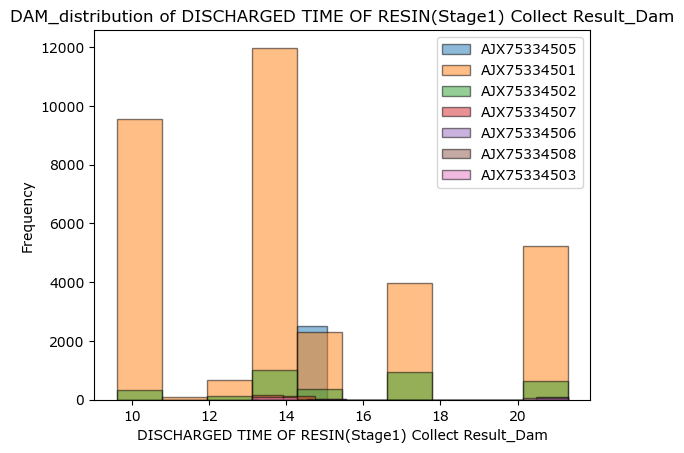

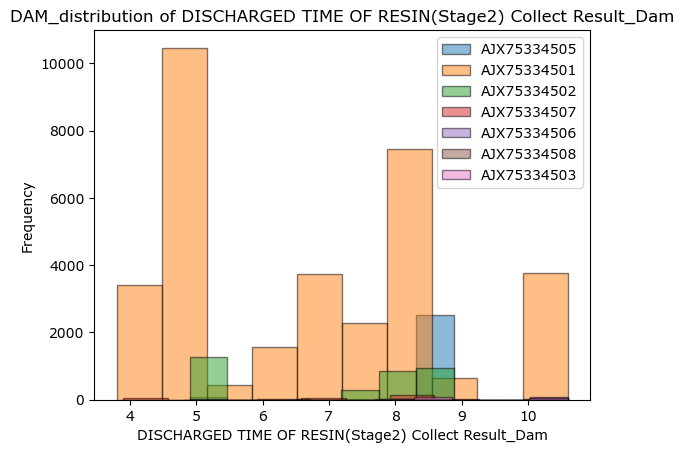

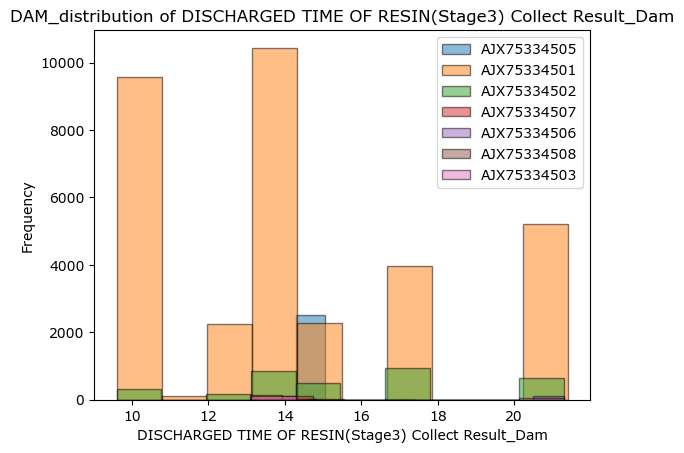

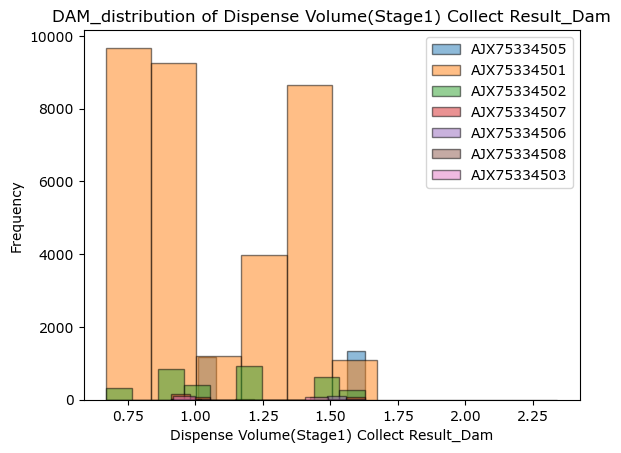

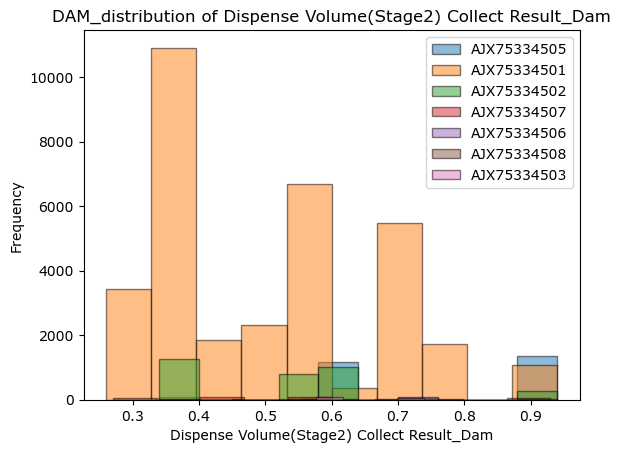

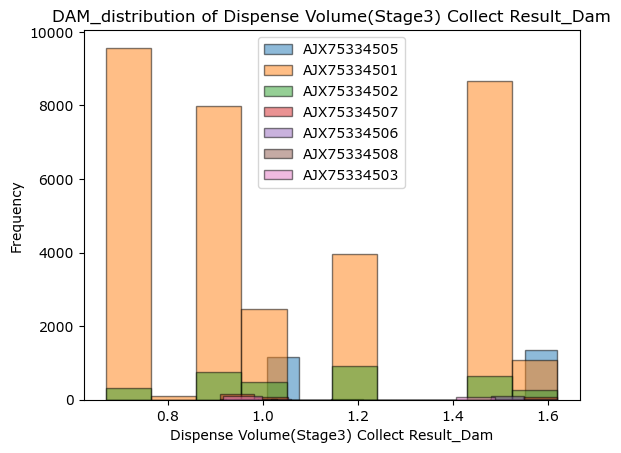

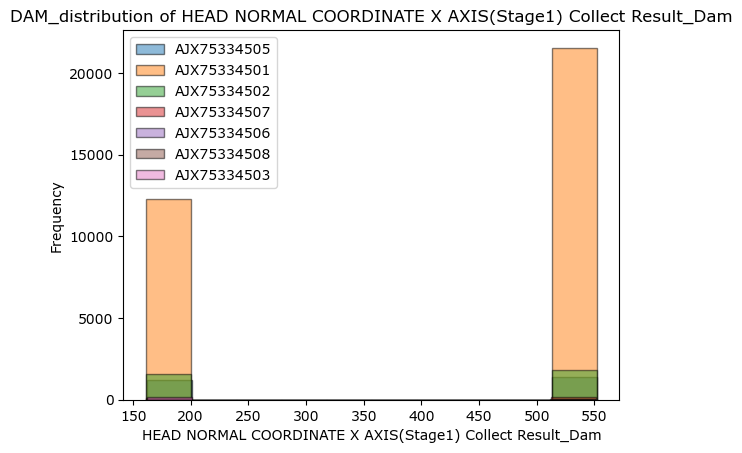

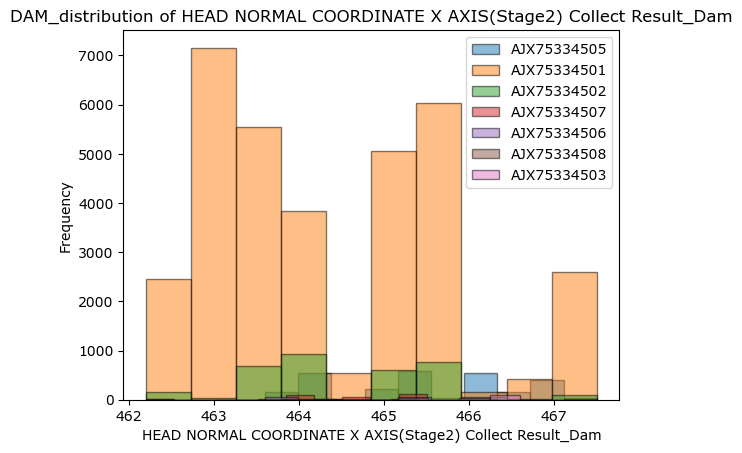

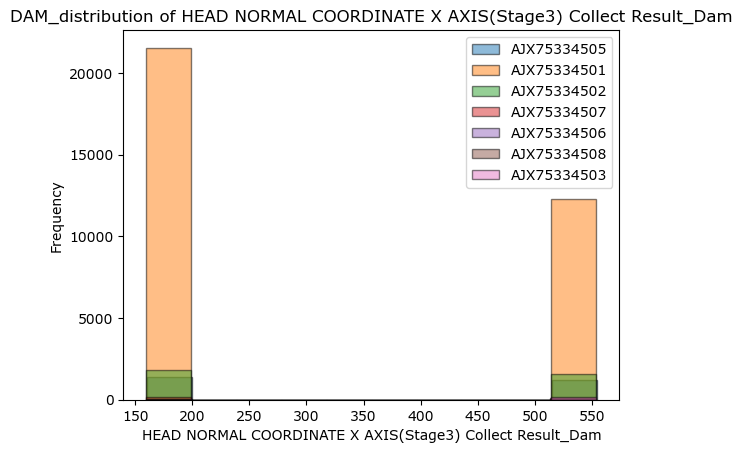

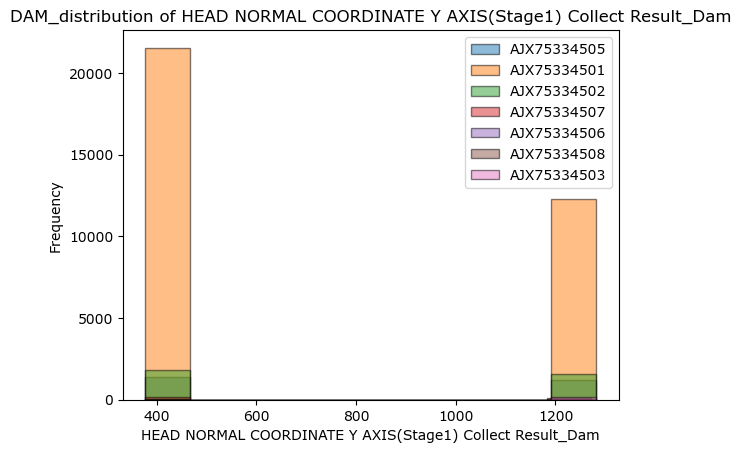

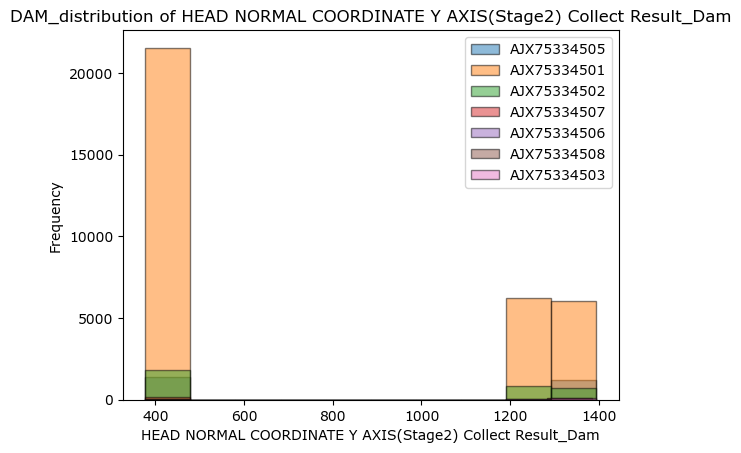

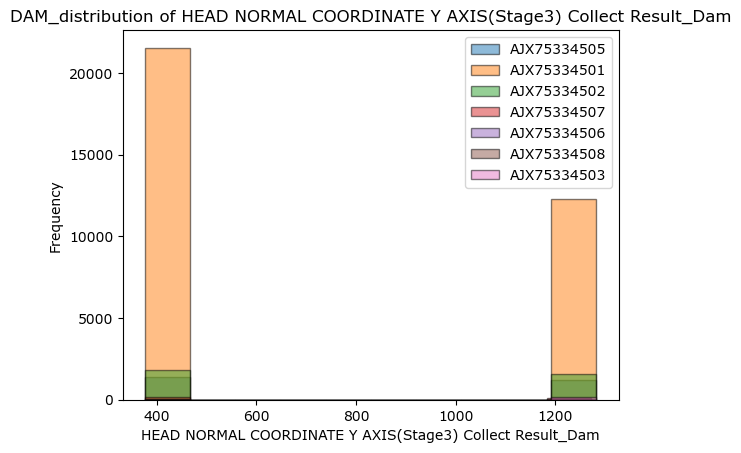

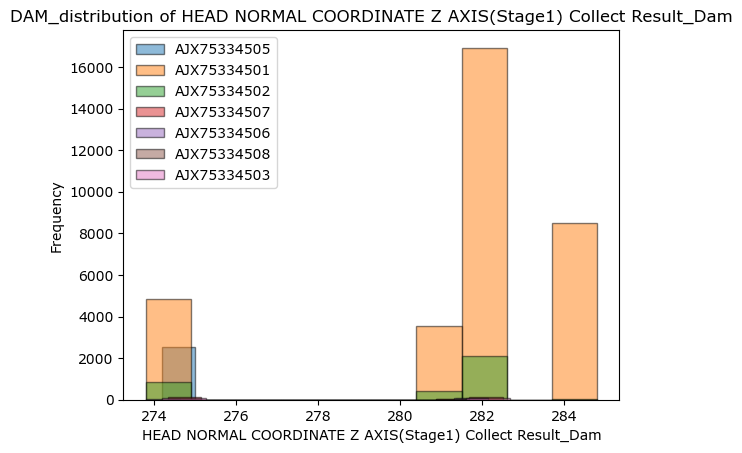

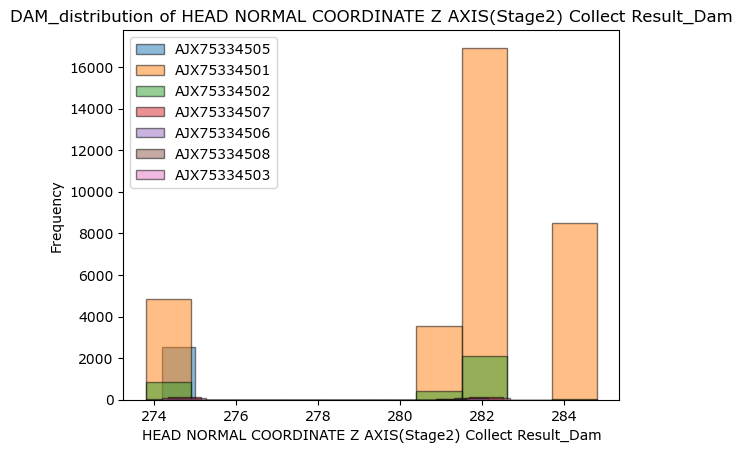

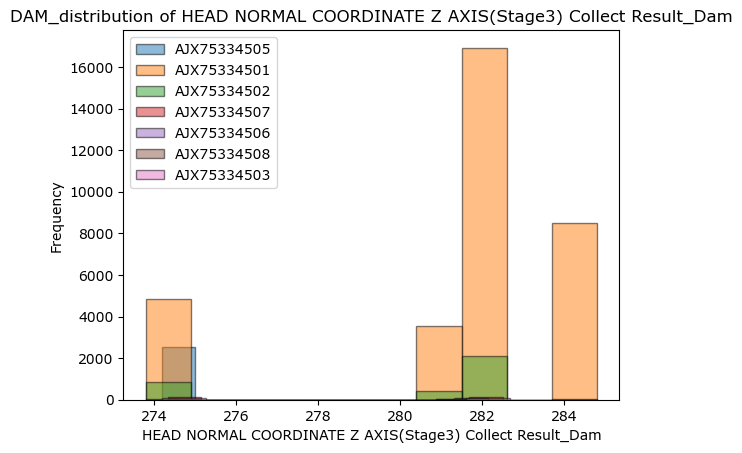

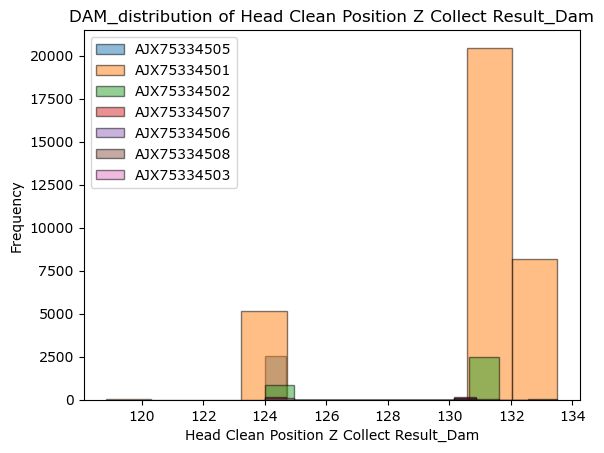

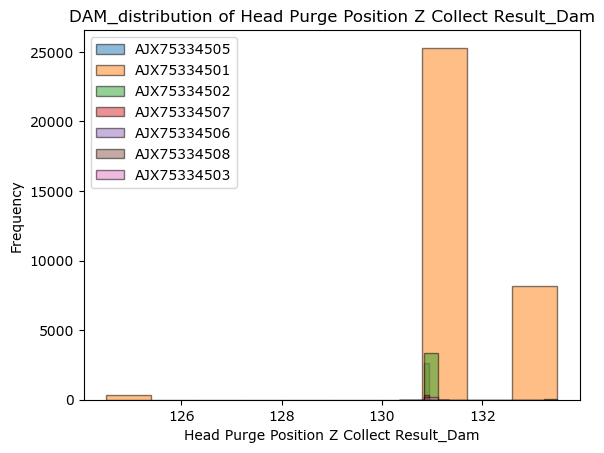

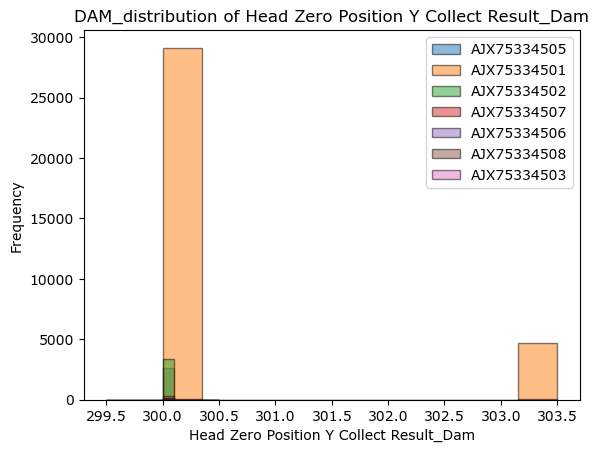

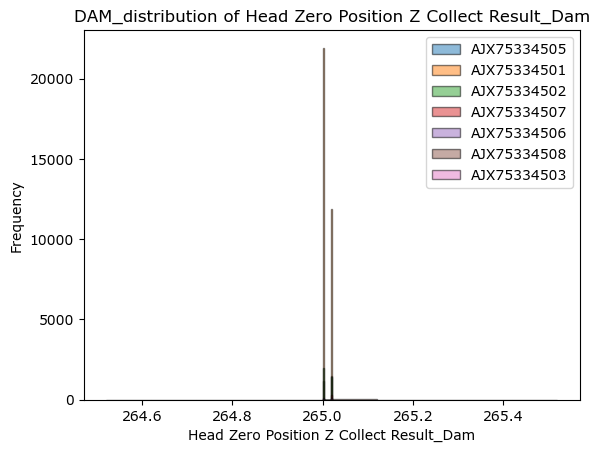

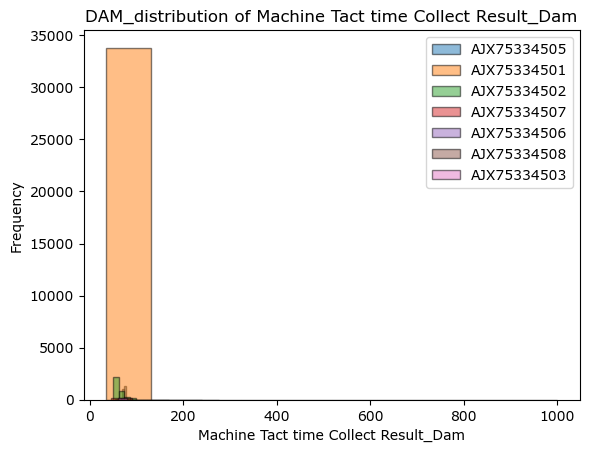

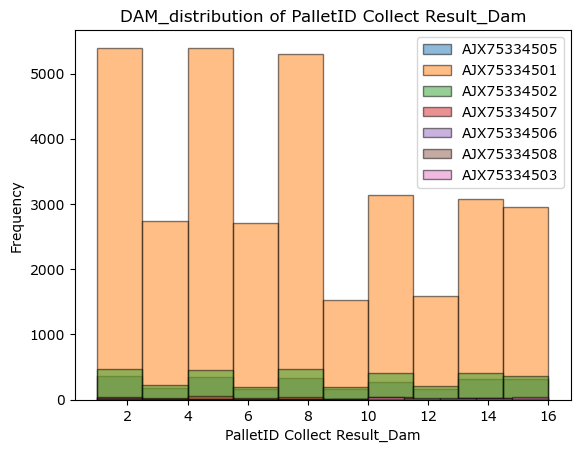

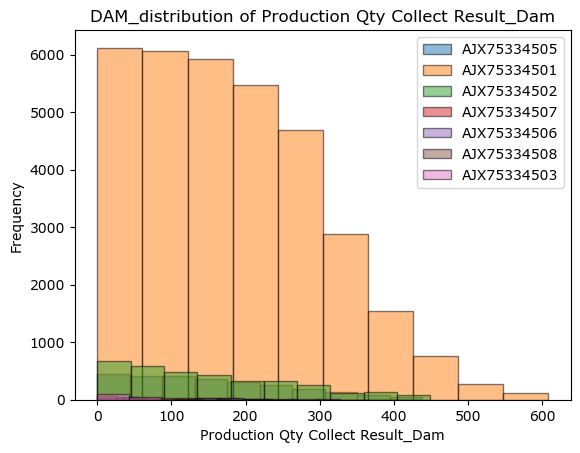

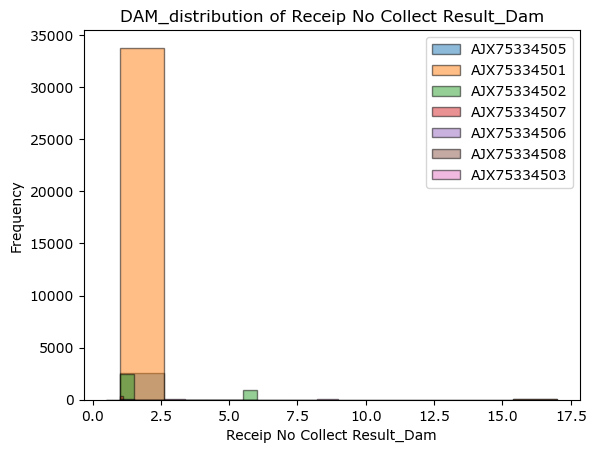

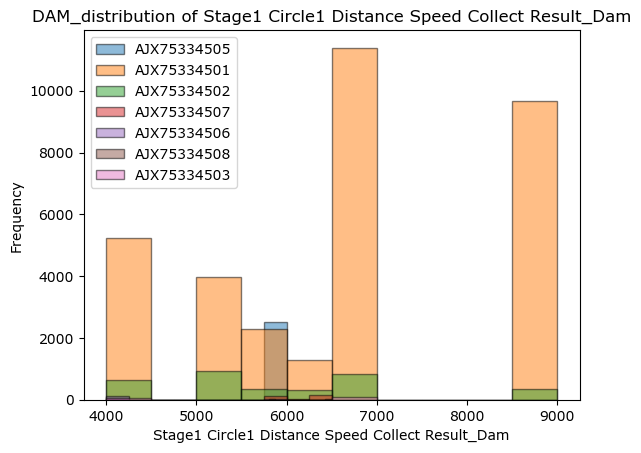

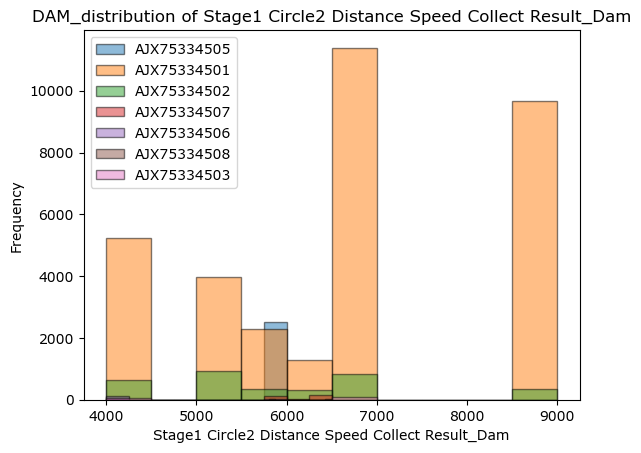

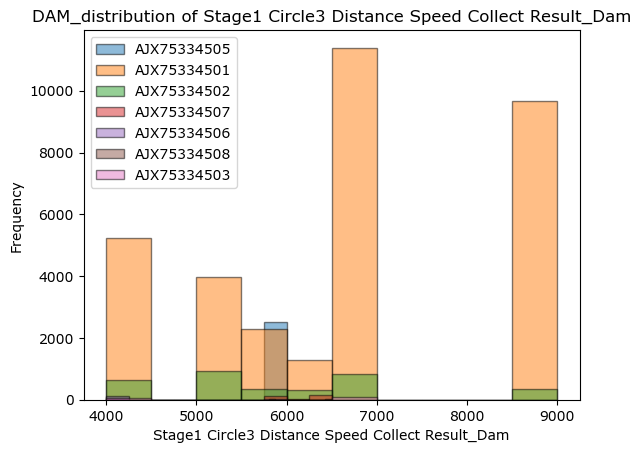

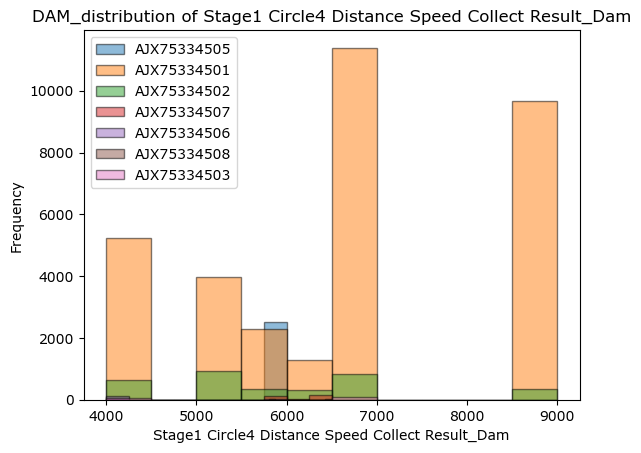

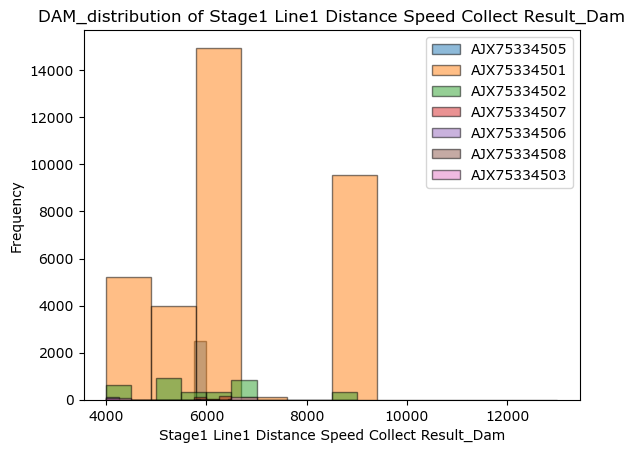

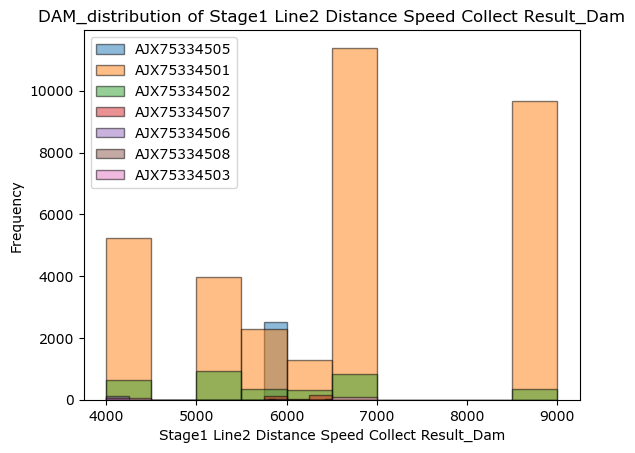

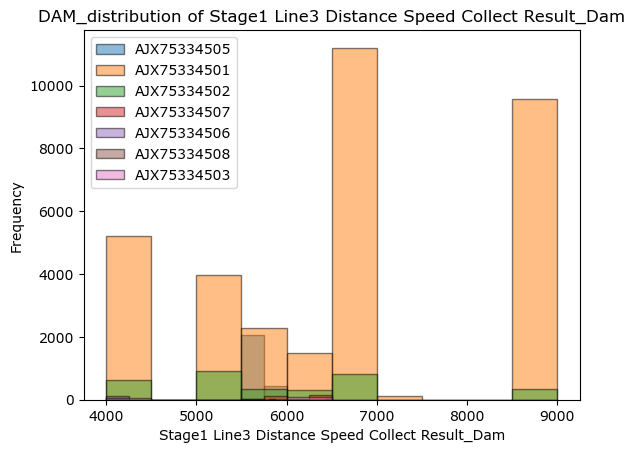

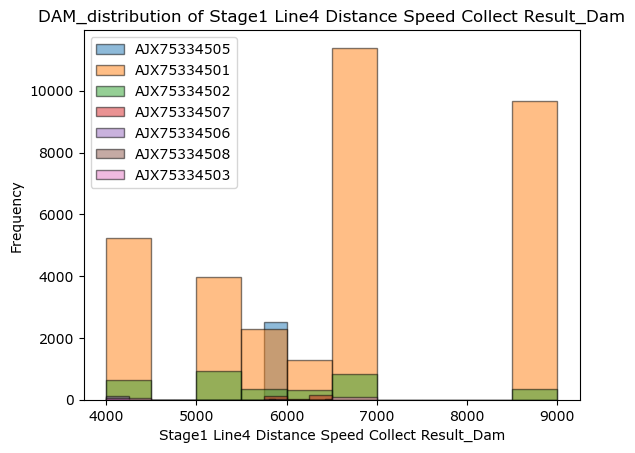

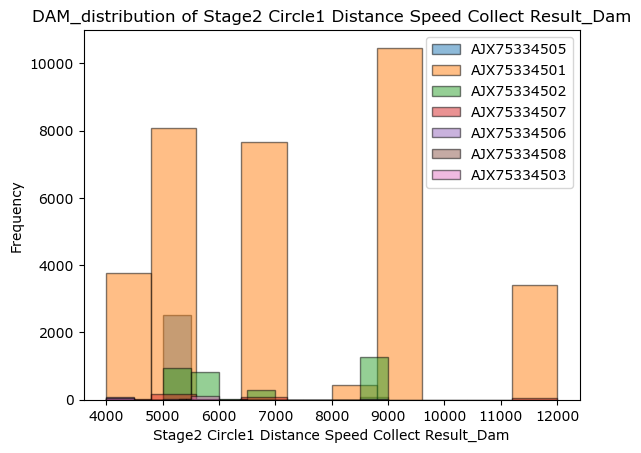

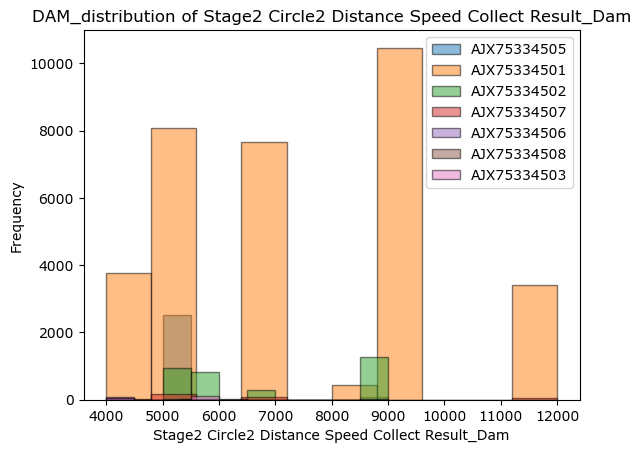

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Dam = df.filter(like="Dam")
Dam["Model.Suffix"]=df["Model.Suffix"]
# Equipment_Dam의 고유 값을 가져옴
equipment_type = Dam['Model.Suffix'].unique()

# 컬러맵에서 고유한 장비 유형의 수에 맞게 색상 생성
cmap = plt.get_cmap('tab10')  # 'tab10' 컬러맵 사용 (10개의 고유 색상 제공)
colors = {eq: cmap(i) for i, eq in enumerate(equipment_type)}

# Dam의 각 열에 대해 반복
for column in Dam.columns:
    if column == "Model.Suffix":  # Equipment_Dam 컬럼은 제외
        continue
    
    # 히스토그램 그리기
    for equipment in equipment_type:
        plt.hist(Dam[Dam["Model.Suffix"]== equipment][column], 
                 color=colors[equipment], 
                 alpha=0.5, 
                 label=equipment, 
                 edgecolor='black')
    
    # 그래프에 제목과 축 라벨 추가
    plt.title(f'DAM_distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.legend(loc='best')
    
    # 그래프 표시
    plt.show()

### 범주형 인코딩

In [29]:
combined_df['Model.Suffix'].unique()

array(['AJX75334505', 'AJX75334501', 'AJX75334502', 'AJX75334507',
       'AJX75334506', 'AJX75334508', 'AJX75334503'], dtype=object)

In [30]:
combined_df['Workorder'].nunique()

663

In [31]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['Model.Suffix']  # 원핫 인코딩할 열 이름

# OneHotEncoder 객체 생성
onehot_encoder = OneHotEncoder(sparse_output=False)  # drop='first'로 첫 범주를 제거하여 다중공선성 방지 (선택사항)

# 원핫 인코딩 수행
encoded_array = onehot_encoder.fit_transform(combined_df[columns_to_encode])

# 인코딩된 결과를 DataFrame으로 변환
encoded_df = pd.DataFrame(encoded_array, columns=onehot_encoder.get_feature_names_out(columns_to_encode))

# 원래 데이터프레임에 인코딩된 열 추가
combined_df1 = pd.concat([combined_df, encoded_df], axis=1)

# 필요 시, 원래의 'Workorder' 열 제거
combined_df1.drop(columns=columns_to_encode, inplace=True)

# 결과 확인
combined_df1.head()

,Equipment_Dam,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,...,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,target,Model.Suffix_AJX75334501,Model.Suffix_AJX75334502,Model.Suffix_AJX75334503,Model.Suffix_AJX75334505,Model.Suffix_AJX75334506,Model.Suffix_AJX75334507,Model.Suffix_AJX75334508
0,Dam dispenser #1,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,14.9,...,127,1,Normal,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Dam dispenser #2,4E1X9167-1,1000.0,12.5,90,85,280,90,16,14.7,...,73,1,Normal,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dam dispenser #1,3M1XH425-1,240.0,2.5,-90,70,1030,-90,16,13.2,...,483,1,Normal,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Dam dispenser #2,4A1XB542-4,1000.0,12.5,90,70,280,90,16,13.2,...,105,1,Normal,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Dam dispenser #2,4E1X9168-1,1000.0,12.5,90,85,280,90,16,14.7,...,78,1,Normal,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 언더 샘플링


데이타 불균형을 해결하기 위해 언더 샘플링을 진행합니다.


In [32]:
normal_ratio = 1.0  # 1.0 means 1:1 ratio

df_normal = combined_df[combined_df["target"] == "Normal"]
df_abnormal = combined_df[combined_df["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

df_normal = df_normal.sample(n=int(num_abnormal * normal_ratio), replace=False, random_state=RANDOM_STATE)
df_concat = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)
df_concat.value_counts("target")

  Total: Normal: 38156, AbNormal: 2350


target
AbNormal    2350
Normal      2350
Name: count, dtype: int64

### 데이터 분할


In [33]:
df_train, df_val = train_test_split(
    df_concat,
    test_size=0.3,
    stratify=df_concat["target"],
    random_state=RANDOM_STATE,
)


def print_stats(df: pd.DataFrame):
    num_normal = len(df[df["target"] == "Normal"])
    num_abnormal = len(df[df["target"] == "AbNormal"])

    print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}" + f" ratio: {num_abnormal/num_normal}")


# Print statistics
print(f"  \tAbnormal\tNormal")
print_stats(df_train)
print_stats(df_val)

  	Abnormal	Normal
  Total: Normal: 1645, AbNormal: 1645 ratio: 1.0
  Total: Normal: 705, AbNormal: 705 ratio: 1.0


## 3. 모델 학습


### 모델 정의


In [34]:
model = RandomForestClassifier(random_state=RANDOM_STATE)

### 모델 학습


In [35]:
features = []

for col in df_train.columns:
    try:
        df_train[col] = df_train[col].astype(int)
        features.append(col)
    except:
        continue

train_x = df_train[features]
train_y = df_train["target"]

model.fit(train_x, train_y)

RandomForestClassifier(random_state=110)

## 4. 제출하기


### 테스트 데이터 예측


테스트 데이터 불러오기


In [37]:
test_data = pd.read_csv("C:\\박소현\\LGAIMERS5th\\test_shift_final.csv")

In [38]:
df_test_x = test_data[features]

for col in df_test_x.columns:
    try:
        df_test_x.loc[:, col] = df_test_x[col].astype(int)
    except:
        continue

In [39]:
test_pred = model.predict(df_test_x)
test_pred

array(['Normal', 'AbNormal', 'Normal', ..., 'AbNormal', 'Normal',
       'AbNormal'], dtype=object)

### 제출 파일 작성


In [40]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("C:\박소현\LGAIMERS5th\data\submission1.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**
